# Guia 4

## Ejercicio 2

Implemente el método de clustering k-medias sobre el conjunto de datos Iris (GTP2) y compare las soluciones obtenidas con las de un SOM.  Para esto obtenga las matrices de contingencia entre ambos métodos y entre cada método y la clase de referencia.

Seleccione 2 dimensiones y grafique los datos coloreando cada punto según el grupo al que pertenece la solución de k-medias y en la del SOM.

Grafique las neuronas del SOM en 2D con una escala de colores según las frecuencias de activación para los datos de Iris. Indique además cuál es la clase de Iris de cada neurona.

### Entrenamiento

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from collections import Counter
import seaborn as sns
from Som import Som
from Kmeans import Kmeans

#cargar dataset iris
data = load_iris()
x = data.data  
y = data.target

# entrenar SOM
som10 = Som(
    N=10,
    vecindades=[(5,5), (4,1), (0,0)],
    tasa_aprendizaje=[(0.9, 0.7), (0.7, 0.1), (0.1, 0.01)],
    epocas=[100, 200, 600]
)
_ = som10.entrenar(x)

# entrenar K-means
kmeans = Kmeans(N=3)
_ = kmeans.entrenar(x)

### Resultados

Text(0.5, 1.0, 'Matriz de contingencia K-means vs SOM 10x10')

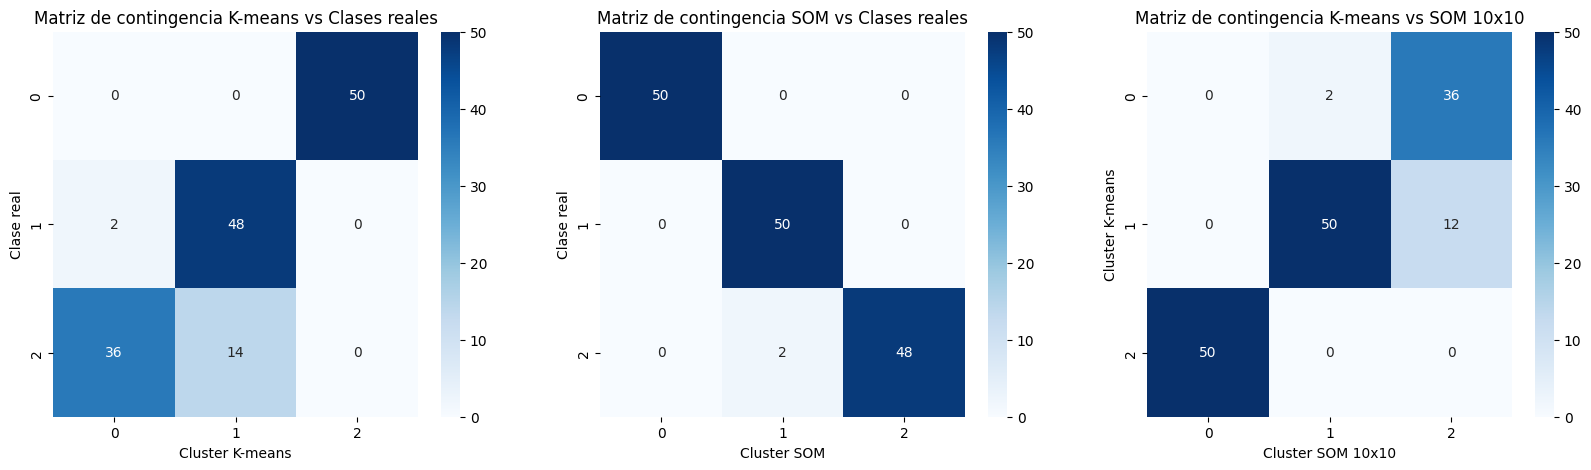

In [2]:
y_kmeans = kmeans.predecir(x)

# entrenar SOM
y_som10 = som10.predict(x)

# mapear coordenadas de neurona a un cluster (mayoría de clases)
mapping = {}
for i in range(len(x)):
    key = tuple(y_som10[i])
    if key not in mapping:
        mapping[key] = []
    mapping[key].append(y[i])

neuron_labels = {k: Counter(v).most_common(1)[0][0] for k, v in mapping.items()}
y_som10_mapped = np.array([neuron_labels[tuple(winner)] for winner in y_som10])

# ===== matrices de contingencia =====
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
cm_kmeans = confusion_matrix(y, y_kmeans)
sns.heatmap(cm_kmeans, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2], ax=ax[0])
ax[0].set_xlabel("Cluster K-means")
ax[0].set_ylabel("Clase real")
ax[0].set_title("Matriz de contingencia K-means vs Clases reales")

cm_som10 = confusion_matrix(y, y_som10_mapped)
sns.heatmap(cm_som10, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2], ax=ax[1])
ax[1].set_xlabel("Cluster SOM")
ax[1].set_ylabel("Clase real")
ax[1].set_title("Matriz de contingencia SOM vs Clases reales")

cm_kmeans_som10 = confusion_matrix(y_kmeans, y_som10_mapped)
sns.heatmap(cm_kmeans_som10, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2], ax=ax[2])
ax[2].set_xlabel("Cluster SOM 10x10")
ax[2].set_ylabel("Cluster K-means")
ax[2].set_title("Matriz de contingencia K-means vs SOM 10x10")

sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


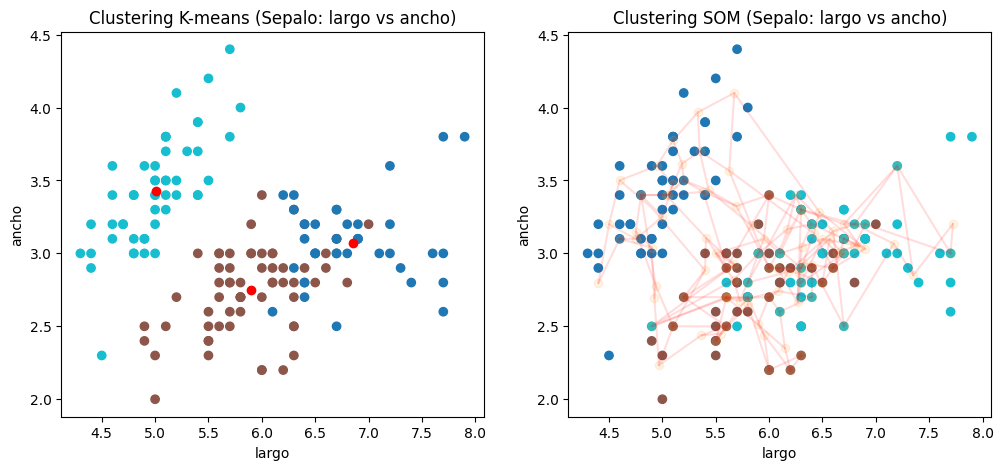

In [3]:
# visualización 2D
for name in data.feature_names:
    print(name)
def somVSkm(D1: int, D2: int, x, km: Kmeans, som: Som, y_km, y_som, title: str, D1_label: str, D2_label: str):
    fig, ax = plt.subplots(1,2)
    fig.set_figheight(5)
    fig.set_figwidth(12)

    # ===== k-means =====
    ax[0].scatter(x[:,D1], x[:,D2], c=y_km, cmap="tab10")
    ax[0].scatter(km.centroides[:,D1], km.centroides[:,D2], c='r')
    ax[0].set_title(f"Clustering K-means ({title})")
    ax[0].set_xlabel(D1_label)
    ax[0].set_ylabel(D2_label)

    # ===== som =====
    ax[1].scatter(x[:,D1], x[:,D2], c=y_som, cmap="tab10")

    ax[1].scatter(som.W[:,:,D1], som.W[:,:,D2], c="#FFA52F22", marker='o')
    for n in range(som.N):
        ax[1].plot(som.W[n,:,D1], som.W[n,:,D2], c='#FF000022')
        ax[1].plot(som.W[:,n,D1], som.W[:,n,D2], c='#FF000022')

    ax[1].set_title(f"Clustering SOM ({title})")
    ax[1].set_xlabel(D1_label)
    ax[1].set_ylabel(D2_label)

somVSkm(0, 1, x, kmeans, som10, y_kmeans, y_som10_mapped, 'Sepalo: largo vs ancho', 'largo', 'ancho')

### Otras dimensiones

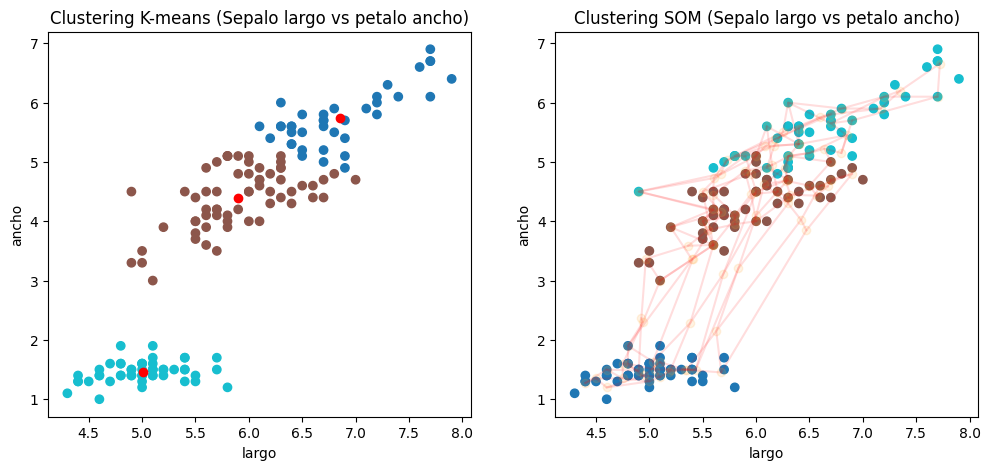

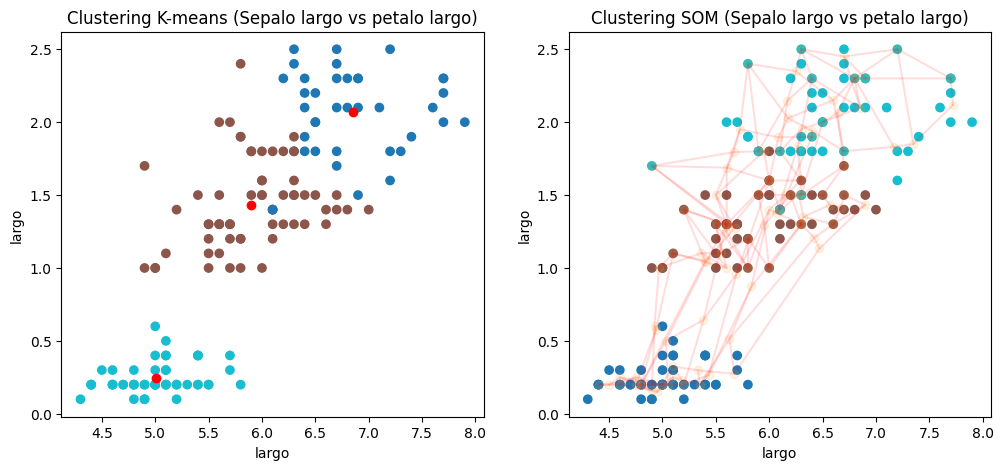

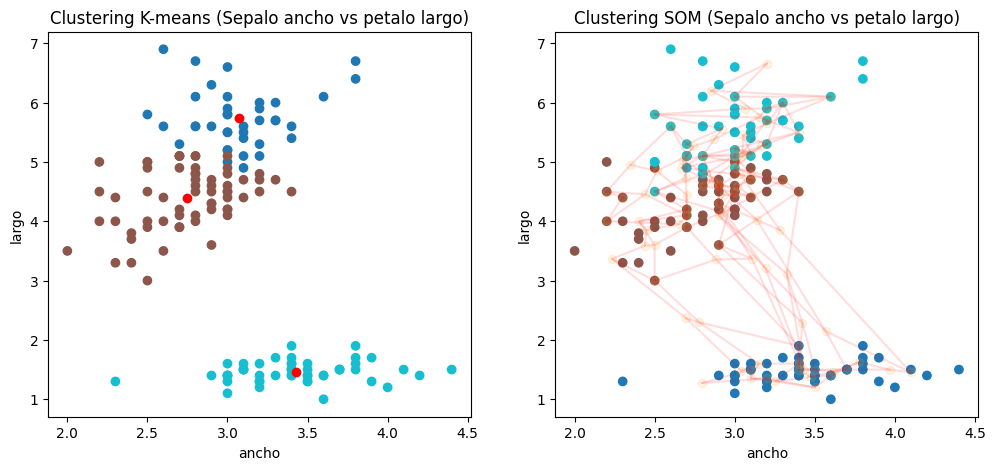

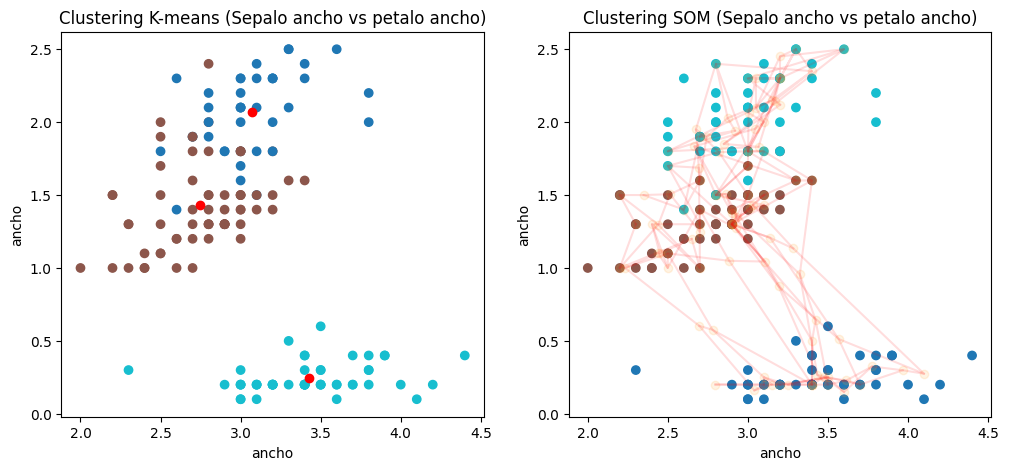

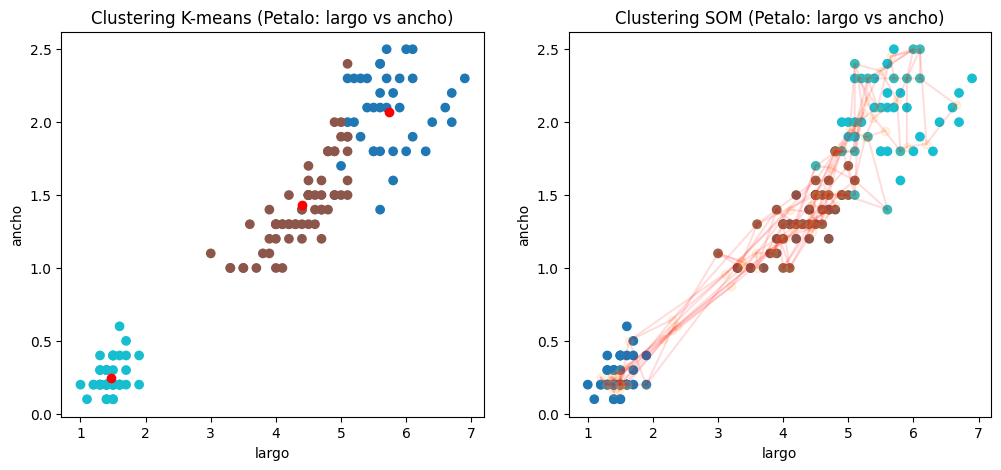

In [4]:
somVSkm(0, 2, x, kmeans, som10, y_kmeans, y_som10_mapped, 'Sepalo largo vs petalo ancho', 'largo', 'ancho')
somVSkm(0, 3, x, kmeans, som10, y_kmeans, y_som10_mapped, 'Sepalo largo vs petalo largo', 'largo', 'largo')
somVSkm(1, 2, x, kmeans, som10, y_kmeans, y_som10_mapped, 'Sepalo ancho vs petalo largo', 'ancho', 'largo')
somVSkm(1, 3, x, kmeans, som10, y_kmeans, y_som10_mapped, 'Sepalo ancho vs petalo ancho', 'ancho', 'ancho')
somVSkm(2, 3, x, kmeans, som10, y_kmeans, y_som10_mapped, 'Petalo: largo vs ancho', 'largo', 'ancho')